In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
!pip install xgboost

In [3]:

from sklearn.preprocessing import LabelEncoder, StandardScaler , OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation Metrics 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

# to Suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:

df = pd.read_csv("Final_Clean_Zomato_Mumbai_Dataset.csv",sep=",",engine="python")

print(df.info(memory_usage="deep"))
print("Total memory (bytes):", df.memory_usage(deep=True).sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10766 entries, 0 to 10765
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAME              10766 non-null  object 
 1   PRICE             10766 non-null  float64
 2   CUISINE_CATEGORY  10766 non-null  object 
 3   CITY              10766 non-null  object 
 4   REGION            10766 non-null  object 
 5   URL               10766 non-null  object 
 6   PAGE NO           10766 non-null  int64  
 7   OUTLET_TYPE       10766 non-null  object 
 8   TIMING            10760 non-null  object 
 9   REVIEWS           10766 non-null  object 
 10  RATING            10766 non-null  float64
 11  VOTES             10766 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 6.0 MB
None
Total memory (bytes): 6303956


In [5]:
df

,NAME,PRICE,CUISINE_CATEGORY,CITY,REGION,URL,PAGE NO,OUTLET_TYPE,TIMING,REVIEWS,RATING,VOTES
0,Hitchki,1200.0,"Modern Indian,North Indian,Chinese,Momos,Birya...",Mumbai,Bandra,https://www.zomato.com/mumbai/hitchki-bandra-k...,1,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529.0
1,Baba Falooda,400.0,"Desserts,Ice Cream,Beverages",Mumbai,Mahim,https://www.zomato.com/mumbai/baba-falooda-mah...,1,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723.0
2,Chin Chin Chu,1800.0,"Asian,Chinese",Mumbai,Juhu,https://www.zomato.com/mumbai/chin-chin-chu-ju...,1,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337.0
3,Butterfly High,1000.0,Modern Indian,Mumbai,Bandra,https://www.zomato.com/mumbai/butterfly-high-b...,1,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200.0
4,BKC DIVE,1200.0,"North Indian,Chinese,Continental",Mumbai,Bandra,https://www.zomato.com/mumbai/bkc-dive-bandra-...,1,Bar,1130am to 1am(Mon-Sun),Very Good,4.4,5995.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10761,Tirupati Balaji,500.0,"Chinese,Fast Food,North Indian",Mumbai,Andheri,https://www.zomato.com/mumbai/tirupati-balaji-...,99,Casual Dining,"8am to 11pm,12midnight to 115am(Mon-Sun)",Good,3.5,267.0
10762,Hari Om Snack Bar,350.0,"Fast Food,South Indian,Chinese",Mumbai,Kandivali,https://www.zomato.com/mumbai/hari-om-snack-ba...,99,Quick Bites,11am to 230am(Mon-Sun),Good,3.7,64.0
10763,PitaBurg,400.0,"Fast Food,Lebanese",Mumbai,Lower Parel,https://www.zomato.com/mumbai/pitaburg-lower-p...,99,Quick Bites,"11am to 11pm(Mon,Tue,Wed,Thu,Sun),11am to ...",Average,3.4,99.0
10764,Uncha Otlawala,300.0,"Desserts,Ice Cream",Mumbai,Kandivali,https://www.zomato.com/mumbai/uncha-otlawala-1...,99,Dessert Parlor,9am to 1230AM(Mon-Sun),Good,3.5,29.0


# Preprocessing Required for ML Classification Model.

## Feature Engineering:
we need Feature engineering in our project cause it tells more about data 

#### Making New Column Named 'Cuisine_Count' Cause some Hotels Serves Multiple Cuisine types.

In [6]:
# Split cuisines by comma and count them
df['Cuisine_Count'] = df['CUISINE_CATEGORY'].apply(lambda x: len(x.split(',')) if x else 0)

In [7]:
df['Cuisine_Count'] = pd.to_numeric(df['Cuisine_Count'], errors='coerce')

#### Making New Feature Named 'Region_Group' , its less complex than Feature 'REGION'

In [8]:

region_group_mapping = {
    # Western Suburbs
    'Andheri': 'Western Suburbs',
    'Bandra': 'Western Suburbs',
    'Juhu': 'Western Suburbs',
    'Malad': 'Western Suburbs',
    'Borivali': 'Western Suburbs',
    'Goregaon': 'Western Suburbs',
    'Kandivali': 'Western Suburbs',
    'Vile Parle': 'Western Suburbs',
    'Santacruz': 'Western Suburbs',
    'Jogeshwari': 'Western Suburbs',
    'Dahisar': 'Western Suburbs',
    'Mira Road': 'Western Suburbs', 
    'Vasai': 'Extended Mumbai Region', 
    'Virar': 'Extended Mumbai Region', 
    'Nalasopara': 'Extended Mumbai Region', 
    'Bhayandar': 'Extended Mumbai Region', 


    # South Mumbai
    'Lower Parel': 'South Mumbai',
    'Fort': 'South Mumbai',
    'Colaba': 'South Mumbai',
    'Worli': 'South Mumbai',
    'Parel': 'South Mumbai',
    'Mumbai Central': 'South Mumbai',
    'Nariman Point': 'South Mumbai',
    'Charni Road': 'South Mumbai',
    'Girgaum': 'South Mumbai',
    'Marine Lines': 'South Mumbai',
    'Mahalaxmi': 'South Mumbai',
    'Grant Road': 'South Mumbai',
    'Kemps Corner': 'South Mumbai',
    'Malabar Hill': 'South Mumbai',
    'Churchgate': 'South Mumbai',
    'Breach Candy': 'South Mumbai',
    'Peddar Road': 'South Mumbai',
    'Cuffe Parade': 'South Mumbai',
    'Byculla': 'South Mumbai', 
    'Mazgaon': 'South Mumbai', 
    'Tardeo': 'South Mumbai', 
    'Chowpatty': 'South Mumbai',


    # for Central Suburbs 
    'Powai': 'Central Suburbs',
    'Chembur': 'Central Suburbs',
    'Mulund': 'Central Suburbs',
    'Ghatkopar': 'Central Suburbs',
    'Kurla': 'Central Suburbs',
    'Vashi': 'Navi Mumbai', 
    'Sion': 'Central Suburbs', 
    'Matunga': 'Central Suburbs', 
    'Dadar': 'Central Suburbs', 
    'Mahim': 'Central Suburbs', 
    'Bhandup': 'Central Suburbs',
    'Kanjurmarg': 'Central Suburbs', 
    'Vikhroli': 'Central Suburbs',
    'Wadala': 'Central Suburbs',
    'Sewri': 'Central Suburbs',
    'Prabhadevi': 'Central Suburbs',


    # for Navi Mumbai
    'Navi Mumbai': 'Navi Mumbai', 
    'CBD Belapur': 'Navi Mumbai',
    'Kharghar': 'Navi Mumbai',
    'Airoli': 'Navi Mumbai',
    'Ghansoli': 'Navi Mumbai',
    'Sanpada': 'Navi Mumbai',
    'Nerul': 'Navi Mumbai',
    'Panvel': 'Navi Mumbai',
    'Kalamboli': 'Navi Mumbai',


    # for Thane and Extended Regions
    'Thane': 'Extended Mumbai Region',
    'Kalyan': 'Extended Mumbai Region',
    'Ulhasnagar': 'Extended Mumbai Region',
    'Dombivali': 'Extended Mumbai Region',
    'Mumbra': 'Extended Mumbai Region',
    'Kalwa': 'Extended Mumbai Region',
    'Ambernath': 'Extended Mumbai Region',
    'Alibaug': 'Extended Mumbai Region', 
    'Marol': 'Western Suburbs',
    'Sakinaka': 'Central Suburbs', 
    'Chandivali': 'Central Suburbs',
    'Chakala': 'Western Suburbs', 

    
}


df['Region_Group'] = df['REGION'].map(region_group_mapping).fillna('Other') # Or .fillna(df['REGION'])

print("Added 'Cuisine_Count' and 'Region_Group' features.")
print(df[['REGION', 'Region_Group']].head()) 
print(df['Region_Group'].value_counts()) 

Added 'Cuisine_Count' and 'Region_Group' features.
   REGION     Region_Group
0  Bandra  Western Suburbs
1   Mahim  Central Suburbs
2    Juhu  Western Suburbs
3  Bandra  Western Suburbs
4  Bandra  Western Suburbs
Region_Group
Western Suburbs           3985
Extended Mumbai Region    2047
Central Suburbs           1976
Navi Mumbai               1337
South Mumbai              1185
Other                      236
Name: count, dtype: int64


In [9]:
df['Region_Group'].unique()

array(['Western Suburbs', 'Central Suburbs', 'South Mumbai', 'Other',
       'Navi Mumbai', 'Extended Mumbai Region'], dtype=object)

#### Droping 'NAME' Column

In [10]:
prep_df = df.copy()
prep_df = prep_df.drop('NAME', axis=1)


#### Log Transform on Skewed Columns

In [11]:
prep_df['VOTES']

0        3529.0
1        1723.0
2         337.0
3        1200.0
4        5995.0
          ...  
10761     267.0
10762      64.0
10763      99.0
10764      29.0
10765     121.0
Name: VOTES, Length: 10766, dtype: float64

In [12]:
 prep_df['VOTES'] = np.log1p(prep_df['VOTES'])

In [13]:
prep_df['VOTES']

0        8.169053
1        7.452402
2        5.823046
3        7.090910
4        8.698848
           ...   
10761    5.590987
10762    4.174387
10763    4.605170
10764    3.401197
10765    4.804021
Name: VOTES, Length: 10766, dtype: float64

Correlation Matrix:
                 RATING     VOTES  Cuisine_Count
RATING         1.000000  0.446077       0.193724
VOTES          0.446077  1.000000       0.202959
Cuisine_Count  0.193724  0.202959       1.000000


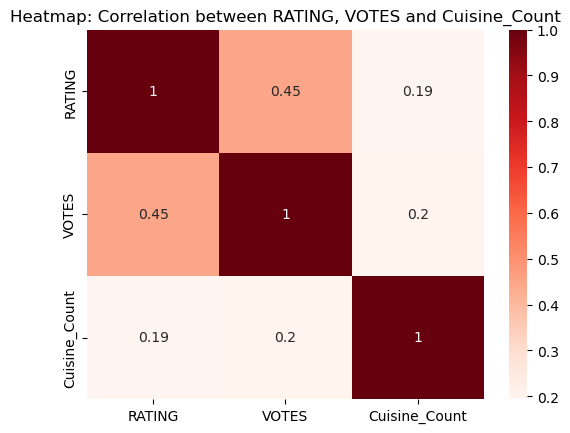

In [14]:


numeric_df = df[['RATING', 'VOTES', 'Cuisine_Count' ]]

# Calculate the correlation
correlation_matrix = numeric_df.corr()

print("Correlation Matrix:")
print(correlation_matrix)


plt.title('Heatmap: Correlation between RATING, VOTES and Cuisine_Count')
sns.heatmap(correlation_matrix, annot=True, cmap='Reds') # annot=True writes the numbers in the boxes
plt.show()

### OneHotEncoder for 'CUISINE_CATEGORY', 'Region_Group', 'OUTLET_TYPE' 

In [15]:

categorical_features = ['CUISINE_CATEGORY', 'Region_Group', 'OUTLET_TYPE' ]

# Initialize of the encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the categorical features
encoded_features = ohe.fit_transform(prep_df[categorical_features])

# Creating  new DataFrame with the encoded features and proper column names.
encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(categorical_features))

# Reset index on prep_df to ensure proper alignment before concatenation
prep_df.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# Drop the original text columns
prep_df = prep_df.drop(columns=categorical_features)

# Combine the original numerical data with the new one-hot encoded data
prep_df = pd.concat([prep_df, encoded_df], axis=1)


####  Label Encoding of 'REVIEWS' 

In [16]:

le_target = LabelEncoder()
prep_df['REVIEWS'] = le_target.fit_transform(prep_df['REVIEWS'])


In [17]:
X = prep_df.drop(['REVIEWS',  'REGION' , 'PRICE' , 'CITY' ,  'REGION' , 'URL' , 'PAGE NO' , 'TIMING' ], axis=1)
y = prep_df['REVIEWS']

### Final df

In [18]:
df

,NAME,PRICE,CUISINE_CATEGORY,CITY,REGION,URL,PAGE NO,OUTLET_TYPE,TIMING,REVIEWS,RATING,VOTES,Cuisine_Count,Region_Group
0,Hitchki,1200.0,"Modern Indian,North Indian,Chinese,Momos,Birya...",Mumbai,Bandra,https://www.zomato.com/mumbai/hitchki-bandra-k...,1,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529.0,8,Western Suburbs
1,Baba Falooda,400.0,"Desserts,Ice Cream,Beverages",Mumbai,Mahim,https://www.zomato.com/mumbai/baba-falooda-mah...,1,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723.0,3,Central Suburbs
2,Chin Chin Chu,1800.0,"Asian,Chinese",Mumbai,Juhu,https://www.zomato.com/mumbai/chin-chin-chu-ju...,1,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337.0,2,Western Suburbs
3,Butterfly High,1000.0,Modern Indian,Mumbai,Bandra,https://www.zomato.com/mumbai/butterfly-high-b...,1,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200.0,1,Western Suburbs
4,BKC DIVE,1200.0,"North Indian,Chinese,Continental",Mumbai,Bandra,https://www.zomato.com/mumbai/bkc-dive-bandra-...,1,Bar,1130am to 1am(Mon-Sun),Very Good,4.4,5995.0,3,Western Suburbs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10761,Tirupati Balaji,500.0,"Chinese,Fast Food,North Indian",Mumbai,Andheri,https://www.zomato.com/mumbai/tirupati-balaji-...,99,Casual Dining,"8am to 11pm,12midnight to 115am(Mon-Sun)",Good,3.5,267.0,3,Western Suburbs
10762,Hari Om Snack Bar,350.0,"Fast Food,South Indian,Chinese",Mumbai,Kandivali,https://www.zomato.com/mumbai/hari-om-snack-ba...,99,Quick Bites,11am to 230am(Mon-Sun),Good,3.7,64.0,3,Western Suburbs
10763,PitaBurg,400.0,"Fast Food,Lebanese",Mumbai,Lower Parel,https://www.zomato.com/mumbai/pitaburg-lower-p...,99,Quick Bites,"11am to 11pm(Mon,Tue,Wed,Thu,Sun),11am to ...",Average,3.4,99.0,2,South Mumbai
10764,Uncha Otlawala,300.0,"Desserts,Ice Cream",Mumbai,Kandivali,https://www.zomato.com/mumbai/uncha-otlawala-1...,99,Dessert Parlor,9am to 1230AM(Mon-Sun),Good,3.5,29.0,2,Western Suburbs


#### Split the data in training and  testing

In [19]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
X_train.dtypes


RATING                                                  float64
VOTES                                                   float64
Cuisine_Count                                             int64
CUISINE_CATEGORY_American                               float64
CUISINE_CATEGORY_American,Arabian,Fast Food,Lebanese    float64
                                                         ...   
OUTLET_TYPE_Microbrewery                                float64
OUTLET_TYPE_Paan Shop                                   float64
OUTLET_TYPE_Pub                                         float64
OUTLET_TYPE_Quick Bites                                 float64
OUTLET_TYPE_Sweet Shop                                  float64
Length: 2857, dtype: object

####  Handle Imbalance with SMOTE 

In [21]:

smote = SMOTE(random_state=42)
print("Before SMOTE")
print(y_train.value_counts())

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("\nAfter SMOTE")
print(y_train_smote.value_counts())

Before SMOTE
REVIEWS
0    4097
2    3469
4     926
1      81
3      39
Name: count, dtype: int64

After SMOTE
REVIEWS
2    4097
0    4097
4    4097
1    4097
3    4097
Name: count, dtype: int64


#### data scaling(fit AND transform the training data)

In [22]:

scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train_smote)

# here We ONLY transform the test data (using the settings learned from training)
X_test_scaled = scaler.transform(X_test)


# print(f"Total features after encoding: {X_train_scaled.shape[1]}")


## Model 1: Logistic Regression

In [23]:
#Creating object of model
lr_model = LogisticRegression(max_iter=1000)

#Train the model
print("Training Logistic Regression...")
lr_model.fit(X_train_scaled, y_train_smote)

#Make predictions 
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model 
print("\nEvaluation for Logistic Regression")

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}\n")

# Classification Report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=le_target.classes_))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Training Logistic Regression...

Evaluation for Logistic Regression
Accuracy: 0.8904

Classification Report:
              precision    recall  f1-score   support

     Average       0.95      0.95      0.95      1024
   Excellent       0.17      0.20      0.18        20
        Good       0.88      0.90      0.89       868
        Poor       0.38      0.50      0.43        10
   Very Good       0.74      0.66      0.70       232

    accuracy                           0.89      2154
   macro avg       0.62      0.64      0.63      2154
weighted avg       0.89      0.89      0.89      2154


Confusion Matrix:
[[977   0  37   8   2]
 [  0   4   1   0  15]
 [ 46   5 779   0  38]
 [  5   0   0   5   0]
 [  0  15  64   0 153]]


## Model 2: K-Nearest Neighbors (KNN)

In [24]:
# --- 1. Initialize the model ---
knn_model = KNeighborsClassifier(n_neighbors=5)

# --- 2. Train the model ---
print("Training K-Nearest Neighbors...")
knn_model.fit(X_train_scaled, y_train_smote)

# --- 3. Make predictions ---
y_pred_knn = knn_model.predict(X_test_scaled)

# --- 4. Evaluate the model ---
print("\n--- Evaluation for K-Nearest Neighbors ---")

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}\n")

# Classification Report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=le_target.classes_))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

Training K-Nearest Neighbors...

--- Evaluation for K-Nearest Neighbors ---
Accuracy: 0.6402

Classification Report:
              precision    recall  f1-score   support

     Average       0.79      0.77      0.78      1024
   Excellent       0.03      0.10      0.05        20
        Good       0.66      0.57      0.61       868
        Poor       0.01      0.10      0.01        10
   Very Good       0.51      0.41      0.46       232

    accuracy                           0.64      2154
   macro avg       0.40      0.39      0.38      2154
weighted avg       0.70      0.64      0.67      2154


Confusion Matrix:
[[788   0 159  63  14]
 [  1   2   6   1  10]
 [176  37 492  95  68]
 [  7   0   2   1   0]
 [ 23  23  82   8  96]]


## Model 3: Decision Tree

In [25]:
# --- 1. Initialize the model ---
dt_model = DecisionTreeClassifier(random_state=70)

# --- 2. Train the model ---
print("Training Decision Tree...")
dt_model.fit(X_train_scaled, y_train_smote)

# --- 3. Make predictions ---
y_pred_dt = dt_model.predict(X_test_scaled)

# --- 4. Evaluate the model ---
print("\n--- Evaluation for Decision Tree ---")

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}\n")

# Classification Report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=le_target.classes_))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Training Decision Tree...

--- Evaluation for Decision Tree ---
Accuracy: 0.9977

Classification Report:
              precision    recall  f1-score   support

     Average       1.00      1.00      1.00      1024
   Excellent       1.00      1.00      1.00        20
        Good       1.00      0.99      1.00       868
        Poor       1.00      1.00      1.00        10
   Very Good       0.98      1.00      0.99       232

    accuracy                           1.00      2154
   macro avg       1.00      1.00      1.00      2154
weighted avg       1.00      1.00      1.00      2154


Confusion Matrix:
[[1024    0    0    0    0]
 [   0   20    0    0    0]
 [   0    0  863    0    5]
 [   0    0    0   10    0]
 [   0    0    0    0  232]]


## Model 4: Random Forest

In [26]:
# --- 1. Initialize the model ---
rf_model = RandomForestClassifier(random_state=12)

# --- 2. Train the model ---
print("Training Random Forest...")
rf_model.fit(X_train_scaled, y_train_smote)

# --- 3. Make predictions ---
y_pred_rf = rf_model.predict(X_test_scaled)

# --- 4. Evaluate the model ---
print("\n--- Evaluation for Random Forest ---")

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}\n")

# Classification Report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le_target.classes_))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Training Random Forest...

--- Evaluation for Random Forest ---
Accuracy: 0.9842

Classification Report:
              precision    recall  f1-score   support

     Average       0.99      1.00      1.00      1024
   Excellent       0.71      0.50      0.59        20
        Good       0.99      0.99      0.99       868
        Poor       0.00      0.00      0.00        10
   Very Good       0.94      0.96      0.95       232

    accuracy                           0.98      2154
   macro avg       0.73      0.69      0.71      2154
weighted avg       0.98      0.98      0.98      2154


Confusion Matrix:
[[1024    0    0    0    0]
 [   0   10    0    0   10]
 [   0    2  863    0    3]
 [  10    0    0    0    0]
 [   0    2    7    0  223]]


C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


## Model 5: XGBoost (eXtreme Gradient Boosting)

In [27]:
# --- 0. Import the model ---


# --- 1. Initialize the model ---
# Parameter 'use_label_encoder' has been removed
xgb_model = XGBClassifier(random_state=104, eval_metric='mlogloss') 

# --- 2. Train the model ---
print("Training XGBoost Classifier...")
# (The rest of your code is perfect)
xgb_model.fit(X_train_scaled, y_train_smote)

# ... (rest of your evaluation code) ...
# --- 3. Make predictions ---
# We use the 'xgb_model' that you just finished training
y_pred_xgb = xgb_model.predict(X_test_scaled)

# --- 4. Evaluate the model ---
print("\n--- Evaluation for XGBoost Classifier ---")

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}\n")

# Classification Report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=le_target.classes_))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

Training XGBoost Classifier...

--- Evaluation for XGBoost Classifier ---
Accuracy: 0.9986

Classification Report:
              precision    recall  f1-score   support

     Average       1.00      1.00      1.00      1024
   Excellent       1.00      1.00      1.00        20
        Good       1.00      1.00      1.00       868
        Poor       1.00      1.00      1.00        10
   Very Good       0.99      1.00      0.99       232

    accuracy                           1.00      2154
   macro avg       1.00      1.00      1.00      2154
weighted avg       1.00      1.00      1.00      2154


Confusion Matrix:
[[1024    0    0    0    0]
 [   0   20    0    0    0]
 [   0    0  865    0    3]
 [   0    0    0   10    0]
 [   0    0    0    0  232]]


# Model Accuracy Analysis


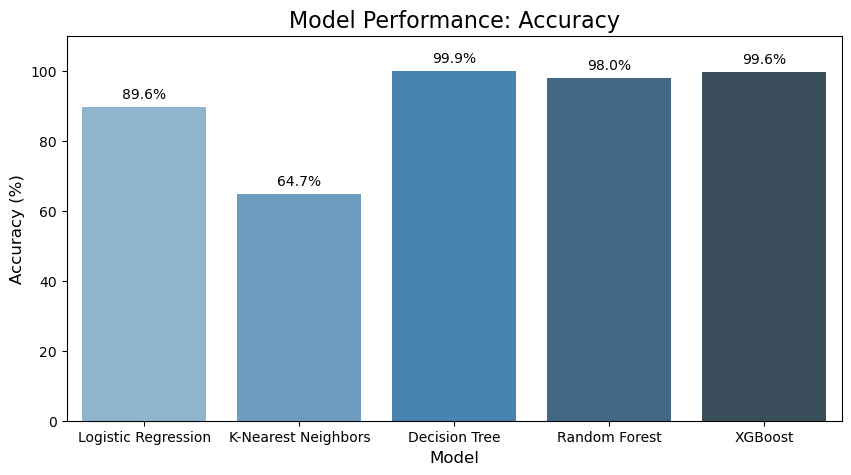

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a DataFrame with the data from your image
data = {
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy (%)': [89.6, 64.7, 99.9, 98.0, 99.6]
}
df_accuracy = pd.DataFrame(data)

# 2. Create the bar plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Model', y='Accuracy (%)', data=df_accuracy, palette='Blues_d')

# 3. Add titles and labels
ax.set_title('Model Performance: Accuracy', fontsize=16)
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_ylim(0, 110) # Give some space at the top

# 4. Add data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.show()

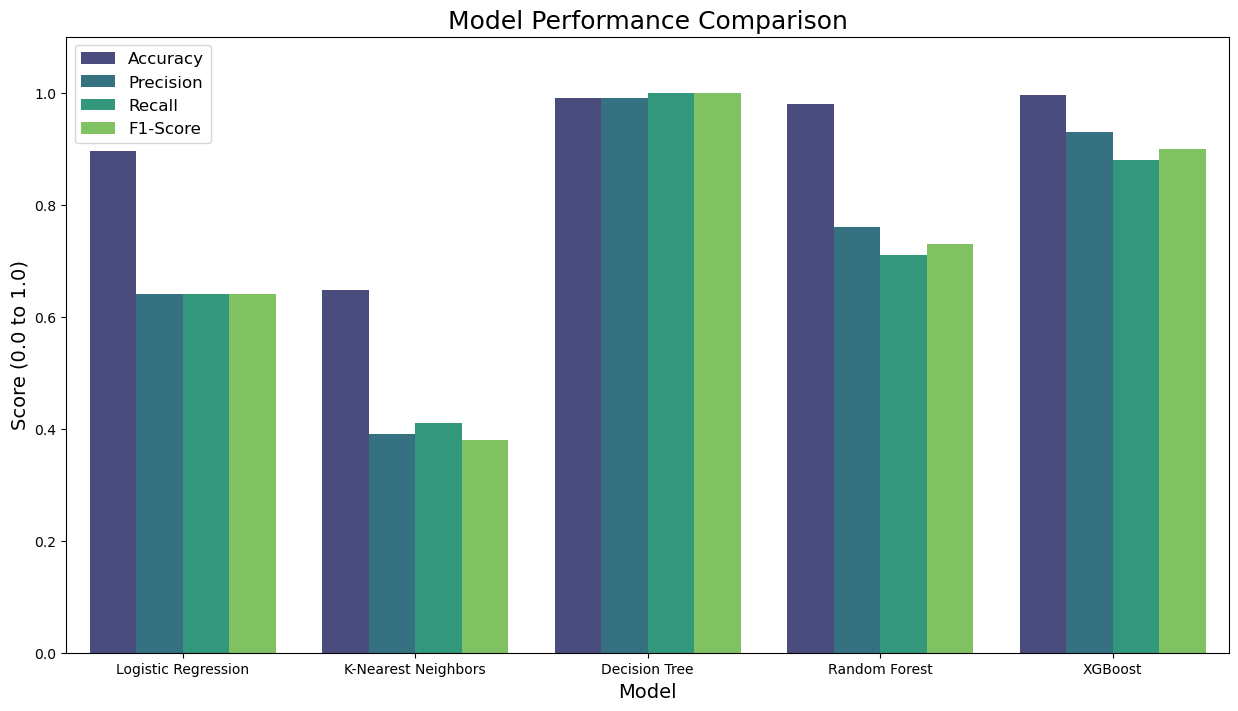

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a DataFrame with all data, normalizing Accuracy
data_all = {
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.896, 0.647, 0.990, 0.980, 0.996], # Converted from %
    'Precision': [0.64, 0.39, 0.99, 0.76, 0.93],
    'Recall': [0.64, 0.41, 1.00, 0.71, 0.88],
    'F1-Score': [0.64, 0.38, 1.00, 0.73, 0.90]
}
df_all = pd.DataFrame(data_all)

# 2. "Melt" the DataFrame into a long format suitable for a grouped bar chart
df_melted = df_all.melt('Model', var_name='Metric', value_name='Score')

# 3. Create the grouped bar plot
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted, palette='viridis')

# 4. Add titles and labels
ax.set_title('Model Performance Comparison', fontsize=18)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Score (0.0 to 1.0)', fontsize=14)
ax.set_ylim(0, 1.1)
plt.legend(fontsize=12)
plt.show()

# for p in ax.patches:
#     ax.annotate(f'{p.get_height():.1f}%', 
#                 (p.get_x() + p.get_width() / 2., p.get_height()), 
#                 ha='center', va='center', 
#                 xytext=(0, 9), 
#                 textcoords='offset points')
plt.savefig("Model Performance Comparison.png")
plt.close()